# Intro

Purpose of this notebook: 
- summarise Poisson distribution
- visualisations
- demonstrate maximum likelihood method
- debunking myth: frequency of claim number realisations should be Poisson

- log-link function calculations

Please note that this is a self-contained notebook, not using any of my functions. 

In [24]:
import numpy as np
import pandas as pd
from scipy.special import factorial # for elementwise factorial calc of array

from matplotlib import pyplot as plt
import seaborn as sns

# Poisson Theory

For reference: [wikipedia page](https://en.wikipedia.org/wiki/Poisson_distribution), lots of extra information there (like assumptions, real-life examples, etc.)

__Parameters__: $\lambda \in (0, \infty)$, this is the mean and variance as well  
__Probability Mass Function__: $Pr(X=k) = \displaystyle \frac{\lambda ^ {k} e ^ {- \lambda}} {k!}$

In [1]:
def poisson_likelihood(actu, pred):
    # the factorial is from the scipy package
    return (np.power(pred, actu)) * np.exp(-pred) / factorial(actu)

def poisson_loglikelihood(actu, pred):
    return np.log(poisson_likelihood(actu, pred))

In [13]:
poisson_likelihood(2, 0.5) == 0.5 ** 2 * np.exp(-0.5) / np.math.factorial(2)

True

In [14]:
poisson_likelihood(2, 0.5)

0.07581633246407918

In [15]:
poisson_loglikelihood(2, 0.5)

-2.5794415416798357

# Generate Data

In [58]:
# variables
lambda1 = 0.85
n1 = 100000

In [59]:
# df1: simple simulated Poisson
df1 = pd.DataFrame.from_dict({'target': np.random.poisson(lambda1, n1)})

In [60]:
# df2: probabilities
df2 = pd.DataFrame.from_dict({'target' : range(10)})
df2['likelihood'] = poisson_likelihood(df2['target'], lambda1)

In [ ]:
claim_freq = 

# Visualisations

## Simulation

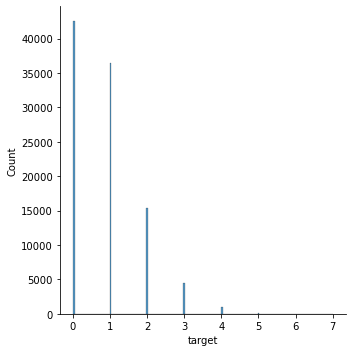

In [61]:
sns.displot(df1['target'])
plt.show()

## Likelihood

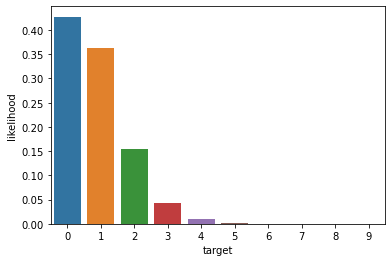

In [62]:
sns.barplot(x = df2['target'], y = df2['likelihood'])
plt.show()

TODO: make these plots match in style. 

# Maximum Likelihood Demonstration

Goal here: demonstrate that the highest likelihood is achieved with simply average. Meaning the maximum likelihood estimation is also the method of moments. 

In [72]:
ml1 = pd.DataFrame({'lambda':np.linspace(0.01,1,100)})

In [73]:
ml1['poisson_loglikelihood'] = ml1['lambda'].apply(lambda x: np.mean(poisson_loglikelihood(df1['target'], x)))

In [76]:
ml1.sort_values('poisson_loglikelihood')

,lambda,poisson_loglikelihood
0,0.01,-4.174989
1,0.02,-3.592320
2,0.03,-3.255631
3,0.04,-3.019651
4,0.05,-2.838855
...,...,...
87,0.88,-1.216687
83,0.84,-1.216463
86,0.87,-1.216459
84,0.85,-1.216344


In [79]:
np.mean(df1['target'])

0.85504

# Claim Occurence Table is not Poisson

how often a certain number of claim occurs is not in itself Poisson - it's not adding Poisson numbers

# Log-link calculations

canonical log-link for stuff like GLM, GBM, etc: log-link, how does it work, and how can we derive gradient and hessian? 